출처: https://wikidocs.net/24987

1. Feed-Forward Neural Network  
- 오직 입력층에서 출력층 방향으로 연산이 전개되는 신경망
- RNN과 같은 순환신경망은 FFNN이 아님 (은닉층의 출력값이 다시 은닉층의 입력값으로 사용됨)

2. Fully-connected layer(FC, Dense layer)
- 어떤 층의 모든 뉴런이 이전 층의 모든 뉴런과 연결되어 있는 층을 전결합층(FC, 완전연결층)이라고 함
- 동일한 의미로 밀집층(Dense layer)라고 부르기도 함  
- 케라스에서는 밀집층을 구현할 때 Dense() 함수를 사용  

3. Activation Function  
특징: Nonlinear Function  
- 선형 함수: 출력이 입력의 상수배만큼 변하는 함수. ex) f(x) = wx + b 에서 w, b는 상수이고 그래프로 시각화 시 직선.
- 비선형 함수: 직선 1개로는 그릴 수 없는 함수  
#? 인공 신경망의 능력을 높이기 위해서는 은닉층을 계속해서 추가해야 함  
#? 종종 활성화 함수를 사용하지 않는 층을 비선형 층들과 함께 인공 신경망의 일부로서 추가하는 경우도 있는데, 학습 가능한 가중치가 새로 생긴다는 점에서 의미가 있음  
선형 함수를 사용한 층을 활성화 함수를 사용한 은닉층과 구분하기 위해 선형층(linear layer) 혹은 투사층(projection layer)등의 다른 표현을 사용함
- 뒤의 챕터에서 언급할 임베딩 층(embedding layer)도 일종의 선형층

# Activation Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-27-4e89b0f481f3>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x>0, dtype=np.int) # boolean: 참이면 1, 거짓이면 0


<function matplotlib.pyplot.show(close=None, block=None)>

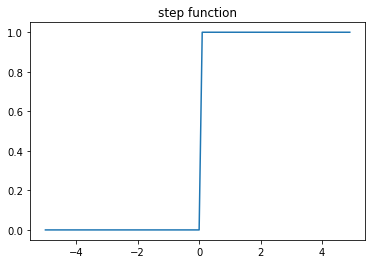

In [27]:
# step function

def step(x):
    return np.array(x>0, dtype=np.int) # boolean: 참이면 1, 거짓이면 0 
x = np.arange(-5.0, 5.0, 0.1) # -5.0과 5.0 사이의 값을 0.1 간격으로 가져옴 # 차이가 10.0 == 0.01*100 이므로 100개의 값을 추출 
y = step(x)
plt.title('step function')
plt.plot(x,y)
plt.show

- 인공신경망 학습과정  
1) 입력층->출력층 방향의 순전파(forward propagation) 연산  
2) 순전파 연산을 통해 나온 예측값과 실제값의 오차를 손실 함수(loss function)을 통해 계산  
3) 손실을 미분을 통해서 기울기(gradient)를 구함  
4) 기울기를 통해 출력층에서 입력층 방향으로 가중치와 편향을 업데이트하는 역전파(back propagation) 수행  

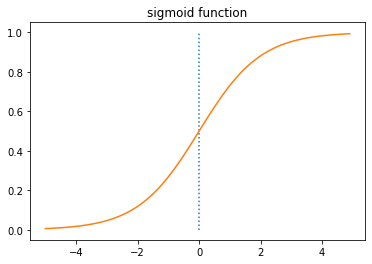

In [16]:
# sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.title('sigmoid function')
plt.plot([0,0], [0,1.0], ':') #가운데 점선 추가 #[x범위],[y범위],'선 종류' #인자의 순서에 따라 선의 방향도 바뀜
plt.plot(x,y)
plt.show()

- gradient vanishing  
시그모이드 함수를 미분한 값은 0.25 이하  
역전파 과정에서 누적해서 곱해지게 되면 기울기(미분 결과)가 제대로 전달되지 않음  
즉, 매개변수 w가 업데이트 되지 않아 학습이 되지 않음
결론적으로 시그모이드 함수의 은닉층에서의 사용은 지양됨 
- 주로 이진 분류를 위해 출력층에서 사용

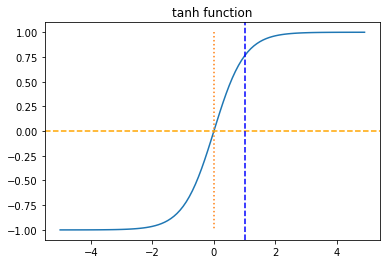

In [20]:
# Hyperbolic tangent function
def tanh(x):
    return np.exp(x)-np.exp(-x) / np.exp(x)+np.exp(-x)
x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)
plt.plot(x,y)
plt.plot([0,0], [1.0, -1.0], ':') # 가운데 세로선
plt.axhline(y=0, color='orange', linestyle='--') # axhline 인자가 y값인 수평선, axvline 인자가 x값인 수직선
#plt.axvline(x=1, color='blue', linestyle='--')
plt.title('tanh function')
plt.show()

- gradient vanishing  
하이퍼볼릭탄젠트 함수도 시그모이드 함수와 같이 기울기 소실 문제 발생  
시그모이드 함수와는 달리 0을 중심으로 하고 있으며, 미분 최대값은 1로 시그모이드 함수의 미분 최대값인 0.25보다 큼  
즉, 미분했을 때 전반적으로 시그모이드 함수보다 큰 값이 나옴  
그러므로, 시그모이드 함수보다는 기울기 소실 증상이 적은 편이며 은닉층에서 시그모이드 함수보다는 선호  

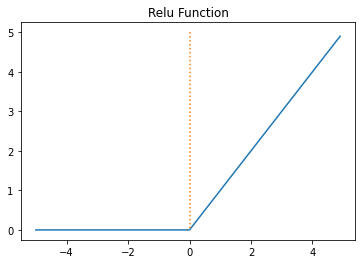

In [23]:
# ReLU
def relu(x):
    return np.maximum(0,x) # f(x) = max(0,x)
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x,y)
plt.plot([0.0,0.0], [5.0, 0.0], ':')
plt.title('Relu Function')
plt.show()

- f(x) = max(0, x)  
음수를 입력하면 0, 양수를 입력하면 입력값을 그대로 반환  
0 이상의 입력값의 경우에는 미분값이 항상 1  
어떤 복잡한 연산이 필요하지 않고, 단순 임계값이므로 연산 속도도 빠름
- 문제: dying ReLU  
입력값이 음수면 기울기(미분값)는 0  
해당 뉴런이 다시 회생하는 것이 어려워 죽은 렐루(dying ReLU)라고 표현

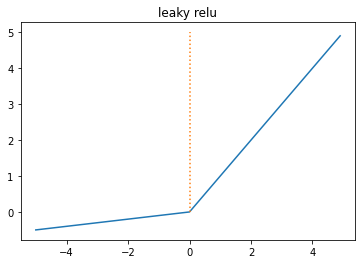

In [24]:
# Leaky ReLU
a = 0.1
def leaky_relu(x):
    return np.maximum(a*x, x)
x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x,y)
plt.plot([0,0],[0,5.0],':')
plt.title('leaky relu')
plt.show()

- f(x) = max(ax, x)  
a는 사용자가 정의하는 하이퍼파라미터로 Leaky('새는') 정도를 결정하며 일반적으로는 0.01의 값을 가짐  
'새는 정도'라는 것은 입력값의 음수일 때의 기울기를 비유  

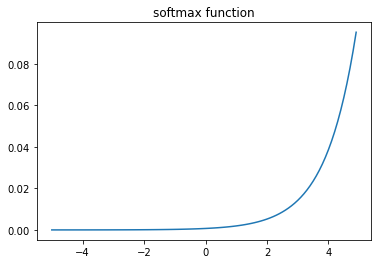

In [26]:
# Softmax Function
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x) / np.sum(np.exp(x)) # e^x / sigma(e^x)
plt.plot(x,y)
plt.title('softmax function')
plt.show()

- 은닉층: 주로 ReLU 계열
- 출력층: 주로 sigmoid 혹은 softmax  
sigmoid: 이진 분류  
softmax: 다중 클래스 분류  
#? 딥러닝으로 이진 분류할 때는 출력층에 로지스틱 회귀를, 딥러닝으로 다중 클래스 분류할 때는 출력층에 소프트맥스 회귀를 사용